In [1]:
# Params
random_seed = 42
target = 'diagnosis'
use_noise = True

# KNN
ks = [k for k in range(1, 27, 2)]
n_splits = 8
test_size = 0.2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, RocCurveDisplay, classification_report, mean_squared_error, r2_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LinearRegression


In [3]:
# Breast Cancer Wisconsin Diagnosis dataset
data = pd.read_csv("data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# Análise exploratória simples
print('Estatísticas:')
print("Número de observações:", data.shape[0])
print("Número de colunas/features:", data.shape[1]) 
data.describe().T


Estatísticas:
Número de observações: 569
Número de colunas/features: 33


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
# Remoção da coluna 'Unnamed: 32' que traz apenas valores NaN
# e da coluna 'id' que não traz valores relevantes para a análise
# a coluna diagnosis recebe 1 para 'M' (malígno) e 0 para B (benígno)
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)
data["diagnosis"]= data["diagnosis"].map(lambda row: 1 if row=='M' else 0)

# Verificamos se há um desbalanceamento entre a quantidade de observações para 1 e para 0
data.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

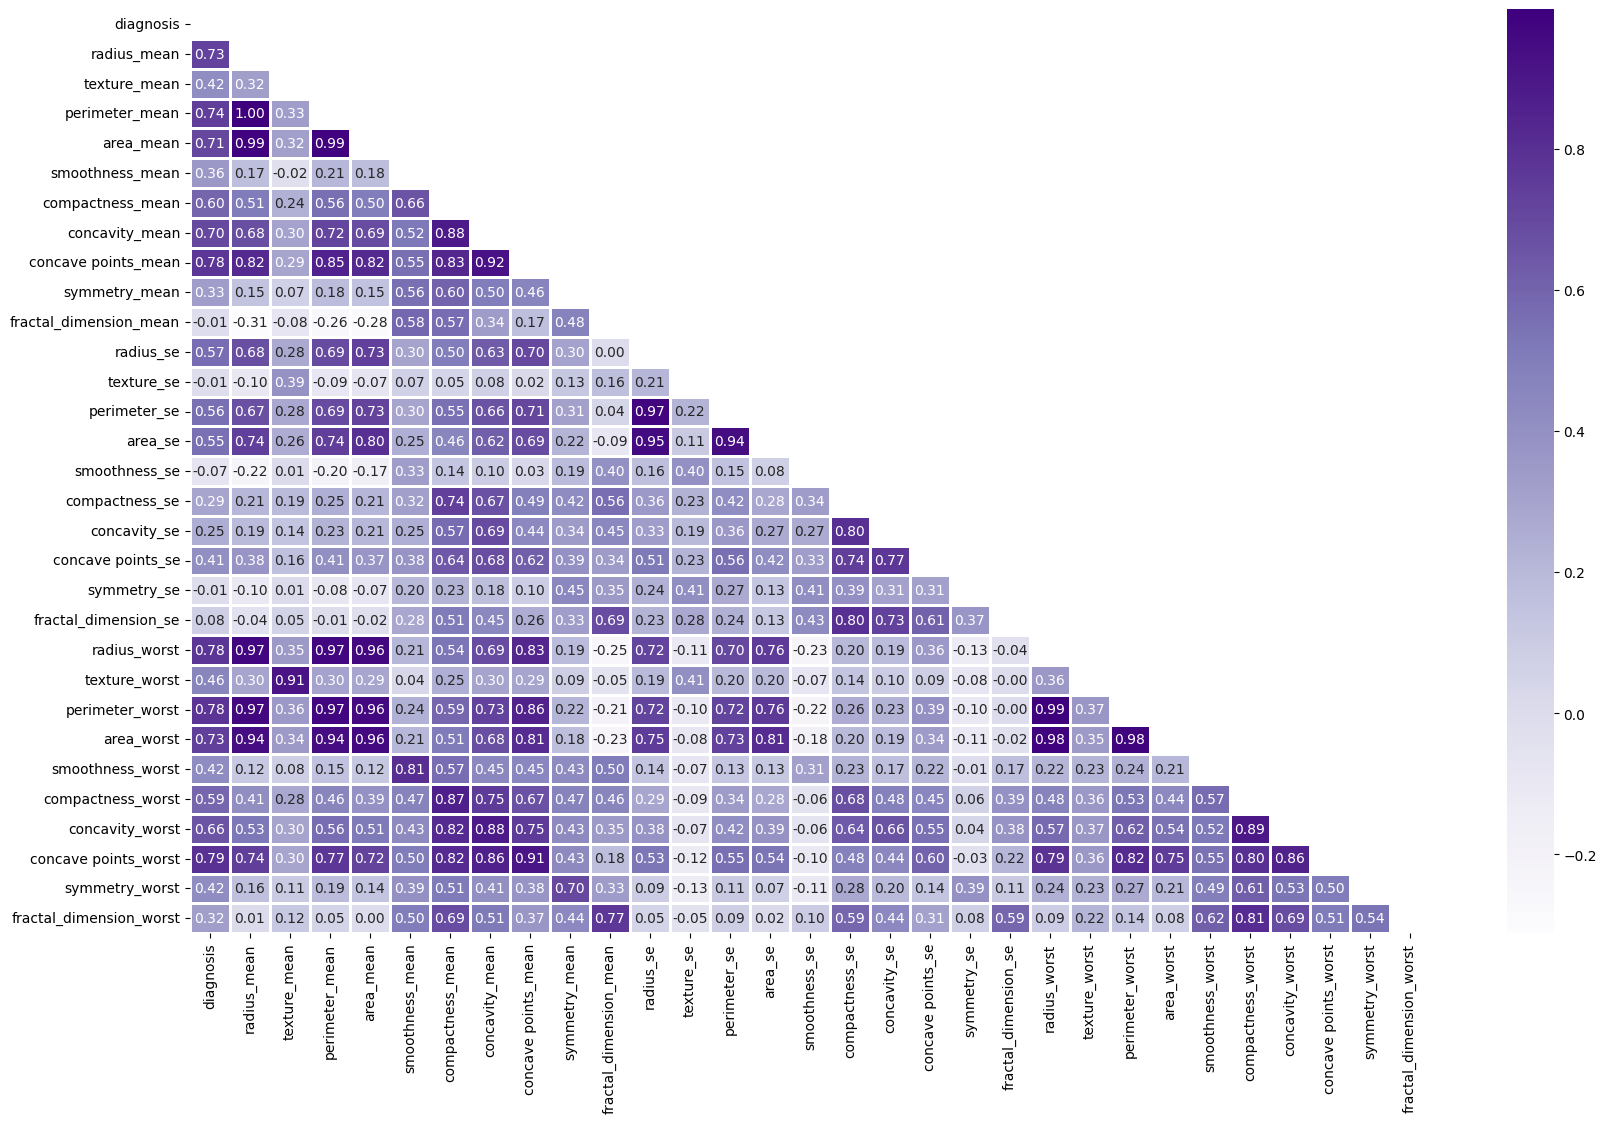

In [6]:
# Análise simples de correação entre as features (o target também)
# Nesse gráfico conseguimos ver correlações bem fortes entre algumas features
plt.figure(figsize = (20, 12))

corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

sns.heatmap(corr, mask = mask, linewidths = 1, annot = True, fmt = ".2f", cmap="Purples")
plt.show()

In [7]:
# Considerando as correlações fortes, podemos pensar em remover algumas colunas
# que tenham uma correlação muito alta entre si, isso ajuda a reduzir o número de features
# sem grandes alterações no resultado final
target = 'diagnosis'

# Cálculo da correlação absoluta
corr_matrix = data.corr().abs() 

# Oculta a diagonal inferior da matriz de correlação para evitar duplicação
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
tri_df = corr_matrix.mask(mask)

# Identifica pares de features que apresentem uma correlação maior do que 0.90
# Ignoramos valores nan e o comparativo é feito apenas entre features de um mesmo grupo (mean, worst, se)
high_corr_pairs = [
    (i, j) for i in tri_df.columns for j in tri_df.index 
    if pd.notna(tri_df.loc[i, j]) and tri_df.loc[i, j] > 0.90
    and i.split('_')[-1] == j.split('_')[-1]  # Compara só mean/mean, worst/worst, etc.
]

# Set criado para as colunas a serem removidas
to_drop = set()

# A variável target não é removida
for col1, col2 in high_corr_pairs:
    if col1 == target or col2 == target:
        continue
    # Garante que o area_mean nao seja removido, precisaremos dessa feature
    if col1 == "area_mean":
        to_drop.add(col2)
        continue
    elif col2 == "area_mean":
        to_drop.add(col1)
        continue 
    # Calcular correlação com o target e manter a mais forte
    if target in data.columns:
        corr_col1 = abs(data[col1].corr(data[target]))
        corr_col2 = abs(data[col2].corr(data[target]))
        col_to_drop = col1 if corr_col1 < corr_col2 else col2
    else:
        # Se não houver target, manter a coluna com maior variância
        var_col1 = data[col1].var()
        var_col2 = data[col2].var()
        col_to_drop = col1 if var_col1 < var_col2 else col2
    
    to_drop.add(col_to_drop)

# Remover colunas selecionadas no to_drop
data = data.drop(to_drop, axis=1)

print(f"Colunas removidas: {to_drop}")
print(f"DataFrame reduzido: {data.shape[1]} colunas")

Colunas removidas: {'radius_worst', 'area_worst', 'perimeter_se', 'concavity_mean', 'perimeter_mean', 'area_se', 'radius_mean'}
DataFrame reduzido: 24 colunas


In [8]:
# Define uma semente para garantir reprodutibilidade
np.random.seed(random_seed)

X_class = data.drop('diagnosis', axis=1)
y_class = data['diagnosis']

# Divisão inicial dos testes
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class,
    y_class,
    test_size=test_size,
    stratify=y_class,
    random_state=random_seed
)

In [9]:
# As features utilizadas possuem escalas diferentes e o KNN é sensível a escalas
# Para normalização dos dados usamos o StandardScaler()
# Aplicamos nos dados de treino e de teste
scaler = StandardScaler()
X_train_scaled_class = scaler.fit_transform(X_train_class)
X_test_scaled_class = scaler.transform(X_test_class)

In [10]:
# Inicialmente verificamos um desbalanceamento nas observações
# Haviam mais observações de casos benignos, do que malígnos (357 x 212)
# Para isso usamos o SMOTE e adicionamos um pequeno ruído para balancear os dados

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled_class, y_train_class)

noise = np.random.normal(loc=0, scale=0.05, size=X_train_res.shape)
X_train_res += noise

# Verificar balanceamento
print("\nDistribuição após balanceamento + ruído:")
print(pd.Series(y_train_res).value_counts())


Distribuição após balanceamento + ruído:
diagnosis
1    285
0    285
Name: count, dtype: int64


Fitting 8 folds for each of 52 candidates, totalling 416 fits

Melhor K encontrado: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



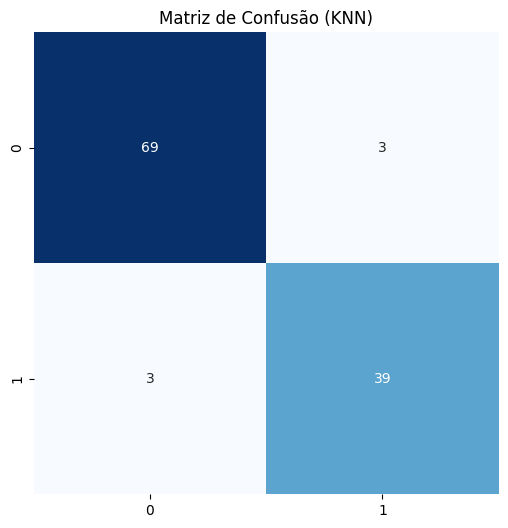

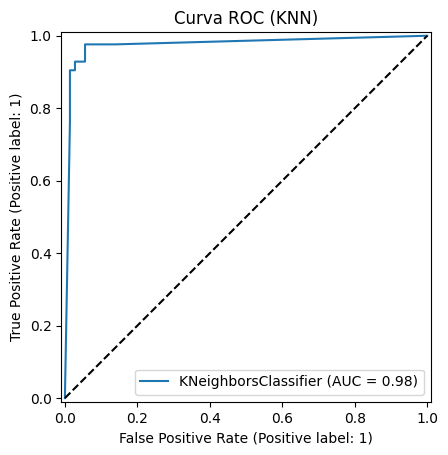

In [11]:
# Define os hiperparametros a serem testados
params = {
    'n_neighbors': ks,
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Configuração do GridSearchCV para encontrar os melhores hiperparametros
# para o modelo KNN
knn = GridSearchCV(
    KNeighborsClassifier(),
    param_grid=params,
    cv=StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=random_seed),
    scoring=['precision', 'recall', 'f1', 'roc_auc'],
    refit='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Treinamento
knn.fit(X_train_res, y_train_res)

# Avaliação do modelo considerando os melhores parametros encontrados
y_pred_class = knn.predict(X_test_scaled_class)
print("\nMelhor K encontrado:", knn.best_params_)
print("\nRelatório de Classificação:")
print(classification_report(y_test_class, y_pred_class))

# Matriz de Confusão
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), 
            annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusão (KNN)")
plt.show()

# Curva ROC
RocCurveDisplay.from_estimator(knn.best_estimator_, X_test_scaled_class, y_test_class)
plt.plot([0,1], [0,1], 'k--')
plt.title("Curva ROC (KNN)")
plt.show()

Regression

In [12]:
# Agora definimos o X e y baseado na regressão, nesse caso nossa variável dependente
# será a feature 'area_mean'
# o target diagosis é removido porque ele não é relevante no caso de regressão
X_reg = data.drop(['diagnosis', 'area_mean'], axis=1)
y_reg = data['area_mean']

In [13]:
# Gera os dados de teste e treino para regressão
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [14]:
# Também é feita a normalização dos dados, assim como na classificação
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

In [15]:
# Roda o trinamento do modelo de regressão linear
lr_model = LinearRegression()
lr_model.fit(X_train_reg_scaled, y_train_reg)



LinearRegression()


Métricas de Regressão:
R²: 0.9694
MSE: 3533.1603


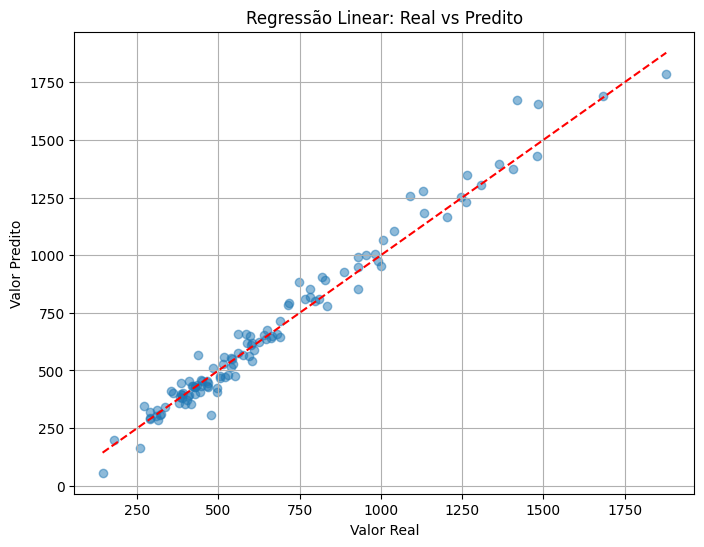

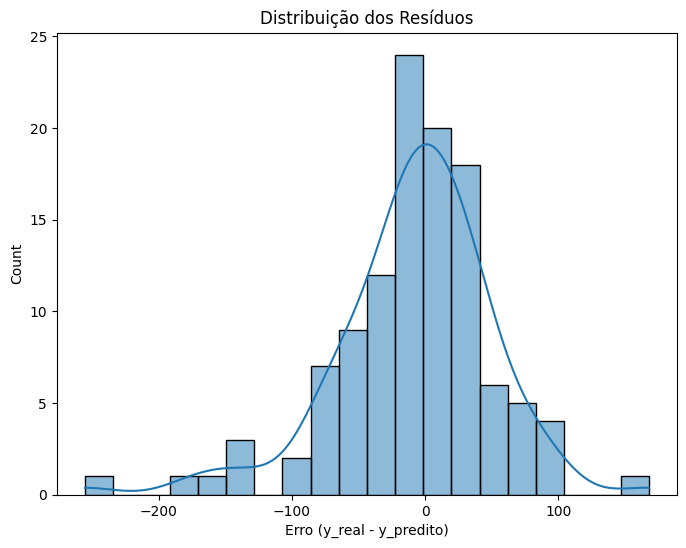

In [ ]:

# Realiza as previsões contínuas
y_pred_reg = lr_model.predict(X_test_reg_scaled)

# Algumas métricas de regressão
print("Métricas de Regressão:")
print(f"R²: {r2_score(y_test_reg, y_pred_reg):.4f}")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")

# Gráfico de Dispersão (Real vs Predito)
plt.figure(figsize=(8,6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 'r--')
plt.xlabel("Valor Real")
plt.ylabel("Valor Predito")
plt.title("Regressão Linear: Real vs Predito")
plt.grid()
plt.show()

# Histograma de Resíduos
residuos = y_test_reg - y_pred_reg
plt.figure(figsize=(8,6))
sns.histplot(residuos, kde=True, bins=20)
plt.title("Distribuição dos Resíduos")
plt.xlabel("Erro (y_real - y_predito)")
plt.show()


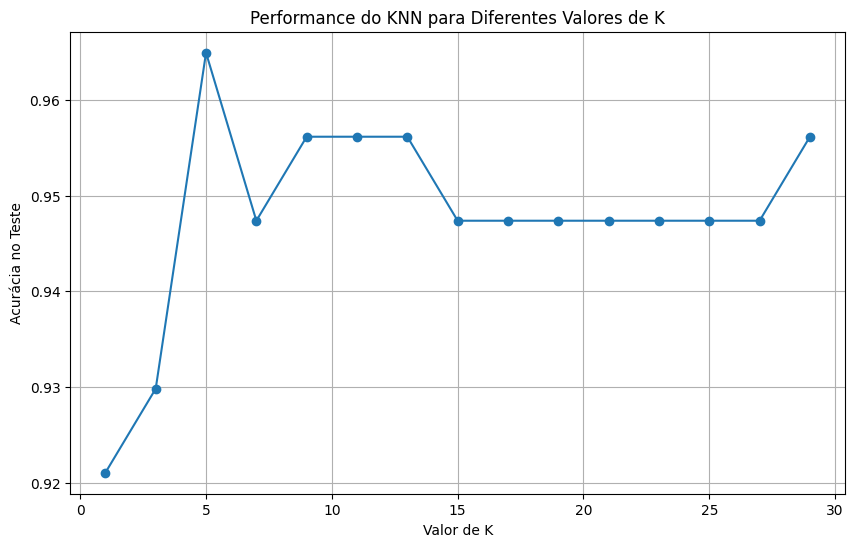

In [17]:
k_values = range(1, 30, 2)
accuracies = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_res, y_train_res)
    accuracies.append(model.score(X_test_scaled_class, y_test_class))

plt.figure(figsize=(10,6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel("Valor de K")
plt.ylabel("Acurácia no Teste")
plt.title("Performance do KNN para Diferentes Valores de K")
plt.grid()
plt.show()

In [18]:
# from sklearn.metrics import classification_report, roc_curve

# # Validação cruzada completa
# cv_results = []
# skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# for train_idx, test_idx in skf.split(X_scaled, y):
#     X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
#     y_train, y_test = y[train_idx], y[test_idx]
    
#     best_knn.fit(X_train, y_train)
#     y_pred = best_knn.predict(X_test)
#     y_proba = best_knn.predict_proba(X_test)[:, 1]
    
#     # Métricas
#     report = classification_report(y_test, y_pred, output_dict=True)
#     fpr, tpr, _ = roc_curve(y_test, y_proba)
#     auc = roc_auc_score(y_test, y_proba)
    
#     cv_results.append({
#         'precision': report['1']['precision'],
#         'recall': report['1']['recall'],
#         'f1': report['1']['f1-score'],
#         'auc': auc
#     })

# # Média das métricas
# metrics_df = pd.DataFrame(cv_results)
# print("\nMétricas médias na validação cruzada:")
# print(metrics_df.mean())

In [19]:
# # Find the best k
# grouped_accuracies = accuracies[['k', 'stat', 'accuracy']].groupby(['k', 'stat']).agg(['mean', 'std']).reset_index()
# grouped_accuracies.columns = ['k', 'stat', 'mean', 'std']
# grouped_accuracies = grouped_accuracies.sort_values(['mean', 'std'], ascending=[False, True]).reset_index(drop=True)
# grouped_accuracies.loc[grouped_accuracies['stat'] == 'test'].head(10)

In [20]:
# test_accuracies = accuracies[accuracies.stat == 'test']

# best_k = test_accuracies.groupby('k')['accuracy'].mean().idxmax()

# best_accuracy = test_accuracies.groupby('k')['accuracy'].mean()[best_k]

# print(f"Melhor valor de k: {best_k}")
# print(f"Acurácia média de teste com k = {best_k}: {best_accuracy:.4f}")

In [21]:
final_knn = KNeighborsClassifier(n_neighbors=best_knn, metric=distance_metric, n_jobs=-1, weights=weights)
final_knn.fit(X_scaled, y)

NameError: name 'best_knn' is not defined

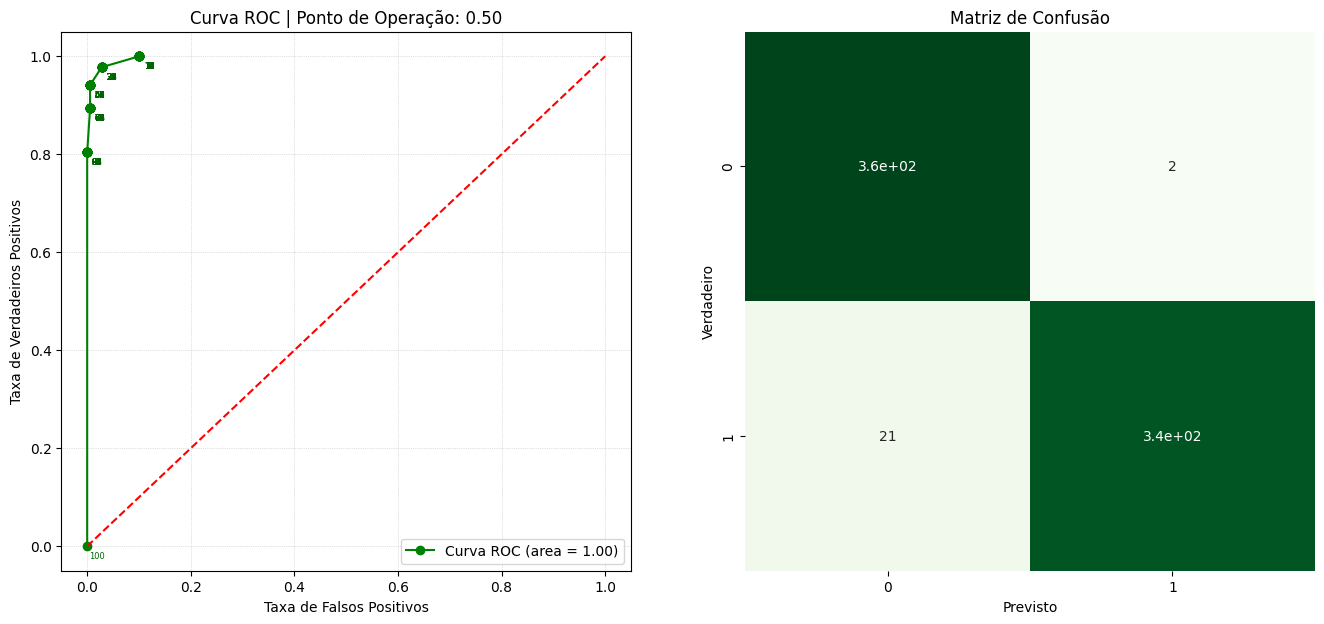

In [ ]:
x_col = model_cols[0]
y_col = model_cols[1]

linspace_points = 50
roc_thresholds = 100

y_pred_proba = final_knn.predict_proba(X_scaled)[:,1]    
proba_linspace = np.linspace(0, 1, roc_thresholds)

roc_points = []
for i, threshold in enumerate(proba_linspace):
    y_pred = (y_pred_proba > threshold).astype(float)
    tp = np.sum((y == 1) & (y_pred == 1))
    tn = np.sum((y == 0) & (y_pred == 0))
    fp = np.sum((y == 0) & (y_pred == 1))
    fn = np.sum((y == 1) & (y_pred == 0))
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    roc_points.append((threshold, fpr, tpr))

if change_operation_point:
    best_operation_point = max(roc_points, key=lambda x: x[2] - x[1])
else:
    best_operation_point = (0.5, 0.5, 0.5)
    
y_pred_operation = (y_pred_proba > best_operation_point[0]).astype(float)

fig = plt.figure(figsize=(25, 7))
# PLOT AND ANNOTATE ROC CURVE
ax = fig.add_subplot(131)
_ = ax.plot([x[1] for x in roc_points], [x[2] for x in roc_points], color='green', label=f'Curva ROC (area = {roc_auc_score(y, y_pred_proba):.2f})', marker='o')
_ = ax.plot([0, 1], [0, 1], color='red', linestyle='--')
_ = ax.set_xlabel('Taxa de Falsos Positivos')
_ = ax.set_ylabel('Taxa de Verdadeiros Positivos')
_ = ax.set_title(f'Curva ROC | Ponto de Operação: {best_operation_point[0]:.2f}')
_ = ax.legend()
_ = ax.grid(which='both', axis='both', color='gray', linestyle=':', linewidth=0.5, alpha=0.5)
# ANNOTATE ROC CURVE
for i, threshold in enumerate(proba_linspace):
    ax.annotate(f'{100.0*threshold:.0f}', (roc_points[i][1], roc_points[i][2]), textcoords='offset points', xytext=(7, -7), ha='center', va='center', fontsize=6, color='darkgreen')

# PLOT CONFUSION MATRIX
conf_matrix = confusion_matrix(y, y_pred_operation)

ax = fig.add_subplot(132)
_ = sns.heatmap(conf_matrix, annot=True, cmap='Greens', cbar=False, ax=ax)
_ = ax.set_xlabel('Previsto')
_ = ax.set_ylabel('Verdadeiro')
_ = ax.set_title('Matriz de Confusão')

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=random_seed)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train_scaled, y_train)

# y_pred = knn.predict(X_test_scaled)

In [ ]:
# print(accuracy_score(y_train, knn.predict(X_train_scaled)))

# knn_acc = accuracy_score(y_test, knn.predict(X_test_scaled))
# print(knn_acc)

In [ ]:
# print(classification_report(y_test, y_pred))

In [ ]:
# print(confusion_matrix(y_test, y_pred))

In [ ]:
# corr = data[features_mean].corr()
# plt.figure(figsize=(14,14))
# sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
#            xticklabels= features_mean, yticklabels= features_mean,
#            cmap= 'coolwarm')

the radius, parameter and area are highly correlated as expected from their relation so from these we will use anyone of them
compactness_mean, concavity_mean and concavepoint_mean are highly correlated so we will use compactness_mean from here
so selected Parameter for use is perimeter_mean, texture_mean, compactness_mean, symmetry_mean*

In [ ]:
# prediction_var = ['texture_mean','perimeter_mean','smoothness_mean','compactness_mean','symmetry_mean']

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=3)
# knn.fit(X_train_scaled, y_train)

In [ ]:
# all_cols = X.columns

# # Group by y and calculate the median of each feature
# centers = data.groupby(['diagnosis'])[all_cols].agg(center_stat).T
# # Calculate the difference between the two centers
# centers['diff'] = abs(centers[1] - centers[0])
# # Sort the centers by the difference between the two centers in descending order
# centers = centers.sort_values('diff', ascending=False)

# centers

In [ ]:
# # Sort the columns by the difference between the two centers
# x_cols_sorted = centers['diff'].sort_values(ascending=False).index.tolist()

# # Create a boxplot of the features comparing the difference between the two centers
# # and color by the y variable
# fig, axs = plt.subplots(1, 4, figsize=(20, 4.5))
# for i, ax in enumerate(axs.flatten()):
#     sns.boxplot(x='diagnosis', y=x_cols_sorted[i], data=data, ax=ax, hue='diagnosis', palette='Dark2')
#     ax.set_ylabel('')
#     ax.set_xlabel('')
#     ax.set_title(x_cols_sorted[i])
#     ax.grid(which='both', linewidth=0.5, axis='y')